In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
titanic = sns.load_dataset('titanic')
titanic.head(10)





,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [31]:
titanic.shape

(891, 15)

In [32]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


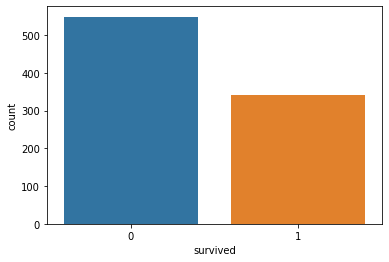

In [34]:
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

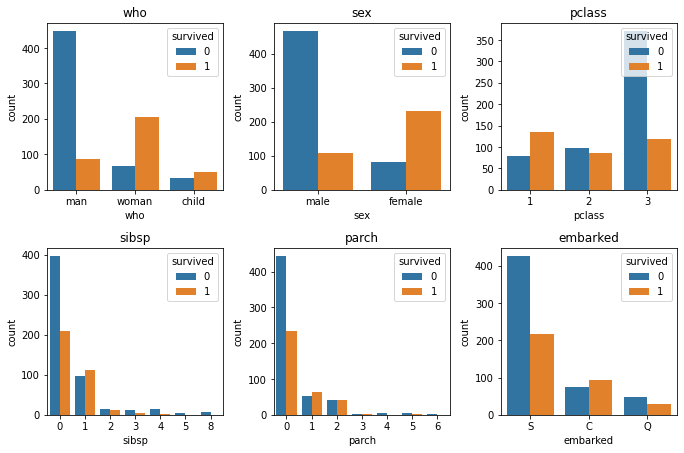

In [35]:
cols = ['who', 'sex', 'pclass', 'sibsp','parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows *3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c #index to go through cols
    ax = axs[r][c]# show position of each subplot
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax = ax)
    ax.set_title(cols[i])
    ax.legend(title='survived', loc = 'upper right')
plt.tight_layout()

In [36]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)#sex
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)#embarked

In [38]:
titanic.dtypes

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked          int64
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [39]:
x = titanic.iloc[:,1:8].values
y = titanic.iloc[:, 0].values




In [40]:
#split data 80% train and 20%test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_tes = train_test_split(x,y, test_size = 0.2, random_state=0)

In [41]:
#scale data to improve speed

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [42]:
def models(x_train, y_train):
  log = LogisticRegression(random_state = 0)
  log.fit(x_train, y_train)
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
  knn.fit(x_train, y_train)

  #Use SVC (linear kernel)
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(x_train, y_train)

  #svc (RBF kernel)
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(x_train, y_train)


  #decision tree

  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(x_train, y_train)

  #random forest classifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(x_train, y_train)

  print('LogAccuracy:', log.score(x_train, y_train))
  print('KNeighbors accuracy: ', knn.score(x_train, y_train))
  print('SVC accuracy: ', svc_lin.score(x_train, y_train))
  print('SVC_rbf accuracy: ', svc_rbf.score(x_train, y_train))
  print('DecisionTree accuracy: ', tree.score(x_train, y_train))
  print('randomForest accuracy: ', forest.score(x_train, y_train))

  return log, knn, svc_lin, svc_rbf, tree, forest





  





In [43]:
model = models(x_train, y_train)

ValueError: ignored